# A Quick Look at the JMCC Menus

We start off by importing some standard definitions.

In [101]:
from dds_lab import *
from collections import Counter

Next, we read in a CSV (comma separated values) file that is stored on the server. This is the week-by-week menu from JMCC. (You can also look at the same data via [this GitHub file](https://github.com/edinburghlivinglab/dds-notebooks/blob/master/data/uoe_catering/JMCC_Student_Menu_2015-2016.csv).)

In [102]:
menu_csv = pd.read_csv("../data/uoe_catering/JMCC_Student_Menu_2015-2016.csv")

We've converted the CSV file into a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) called `menu_csv` using [Pandas](http://pandas.pydata.org). Let's check the value of this DataFrame.

In [103]:
menu_csv

,JMCC STUDENT DINNER MENUS 2015/2016,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MONDAY DINNER WEEK 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COUNTER,NaN,DIETARY,THEATRE,"MENU ITEM,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COUNTER 1,Dish/course,NaN,NaN,SELECTION OF ROLLS ON ALL COUNTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Live Cooking,Main Course,NaN,YES,GRILLED PORK ESCALOPE WITH A CREAMY PEPPER SAUCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Main Course,NaN,NaN,MINCE BEEF PIE WITH A PUFF PASTRY TOPPING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Accomp,V,NaN,OVEN RST VEGETABLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Accomp,V,NaN,BABY BOILED WITH THYME BUTTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Accomp,V,NaN,BAKED SWEET POTATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You'll notice lots of cells containing 'NaN'. This stands for Not a Number, and arises because the menu file has lots of blanks in it. It's been designed for visual inspection rather than for any kind of processing.

We'll focus on the column that is currently labeled 'Unnamed: 4'.

In [104]:
food = menu_csv['Unnamed: 4']

Next, we use the function `dropna` to get rid of the `NaN` values, and also convert it a regular Python list. The notation `[1:]` just says that we want to drop the first item in the list.

In [105]:
food = food.dropna().tolist()[1:]

Let's look at the first 10 items in the list:

In [106]:
food[:9]

['SELECTION OF ROLLS ON ALL COUNTERS',
 'GRILLED PORK ESCALOPE WITH A CREAMY PEPPER SAUCE ',
 'MINCE BEEF PIE WITH A PUFF PASTRY TOPPING ',
 'OVEN RST VEGETABLES ',
 'BABY BOILED WITH THYME BUTTER ',
 'BAKED SWEET POTATO ',
 'WHOLE GREEN BEANS ',
 'MASHED POTATO',
 'PEPPERS STUFFED WITH FETA CHEESE/QUORN & RICE ']

So this is beginning to look more interesting. One simple thing we might want to ask is: what are the most frequent words in the menu items?

We will use the `split()` method to convert a string like `'TOPPED WITH CHEESE'` into a list of words by splitting on every space.

In [107]:
'TOPPED WITH CHEESE'.split()

['TOPPED', 'WITH', 'CHEESE']

And since allcaps is UGLY, we can convert words into lower case with the `lower()` method.

In [108]:
'TOPPED'.lower()

'topped'

In [109]:
food_items = [word.lower() for item in food for word in item.split()]

Let's look at the top 10 items in our new list.

In [110]:
food_items[:9]

['selection',
 'of',
 'rolls',
 'on',
 'all',
 'counters',
 'grilled',
 'pork',
 'escalope']

It would be nice to count how many occurrences of each word appear in this list. Python has a convenient way of getting frequency counts using a `Counter`. It works like this:

In [111]:
c = Counter(food_items)
c.most_common(20)

[('with', 324),
 ('and', 220),
 ('assorted', 206),
 ('potato', 166),
 ('a', 153),
 ('grilled', 144),
 ('rolls', 113),
 ('selection', 103),
 ('tomato', 95),
 ('baked', 87),
 ('sauce', 84),
 ('salad', 75),
 ('of', 71),
 ('bacon', 66),
 ('dressing', 63),
 ('chefs', 61),
 ('choice', 61),
 ('fruit', 61),
 ('breads', 60),
 ('on', 58)]

Whoops, that's not so good. We don't care about boring words like 'with' and 'and'. So let's get rid of them. First, we make a list `boring` of words to ignore. Next, we redefine `food_items`. You can read `[item for item in food_items if item not in boring]` as saying: "construct the list of all items in `food_items` which are not in the `boring` list". Then we count again.

In [112]:
boring = ['a','all','with','on','of','and','item','menu','&','chefs','counters','bar','mixed','choice','assorted','selection']
food_items = [item for item in food_items if item not in boring]
c = Counter(food_items)
c.most_common(20)

[('potato', 166),
 ('grilled', 144),
 ('rolls', 113),
 ('tomato', 95),
 ('baked', 87),
 ('sauce', 84),
 ('salad', 75),
 ('bacon', 66),
 ('dressing', 63),
 ('fruit', 61),
 ('breads', 60),
 ('chicken', 58),
 ('fresh', 58),
 ('vegetable', 56),
 ('yoghurt', 54),
 ('item,', 53),
 ('sweet', 53),
 ('beans', 46),
 ('rst', 43),
 ('onion', 41)]

Surprise! Potatoes are really popular with the JMCC chefs.

If we want, we can convert this frequency list back into a DataFrame, using the following commands.

In [127]:
df = pd.DataFrame.from_dict(c, orient='index')
df = df.rename(columns={0:'count'})
df

,count
merinuges,1
chilies,2
quarter,2
mozzarela,8
oven,6
roast,36
mango,1
fry,4
lancashire,2
brown,2


And we can get a nice looking table by sorting and taking the top 20 items.

In [133]:
df_sorted = df.sort_values(by='count', ascending=False).head(20)
df_sorted

,count
foo,
potato,166
grilled,144
rolls,113
tomato,95
baked,87
sauce,84
salad,75
bacon,66
dressing,63


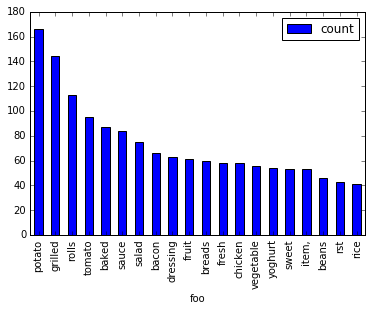

In [139]:
%matplotlib inline
df_sorted.plot(kind='bar')

Finally, we can write this DataFrame back to a CSV file, which we'll call `food_items.csv`.

In [119]:
df.to_csv('food_items.csv')